In [98]:
from IDT_.idt_algo import IDT
from IDT_.ihmm_algo.ihmm import IHMM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter

# F-Shape Heatmap Plot:

In [99]:
warnings.filterwarnings('ignore') 
gaze = pd.read_csv("../eye_tracking_expiriment/x_data_19.csv")



In [100]:
x = gaze['left_gaze_point_on_display_area_x']*1920
y = gaze["left_gaze_point_on_display_area_y"]*-1080+1080

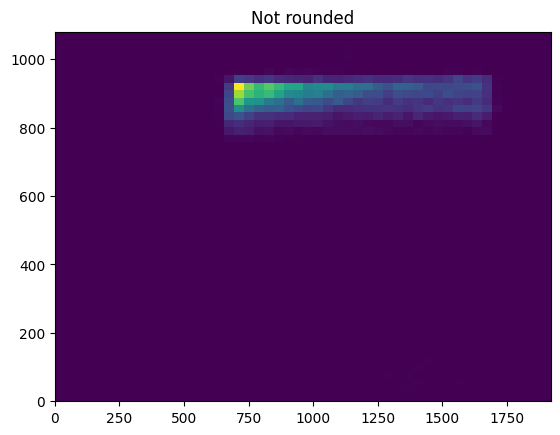

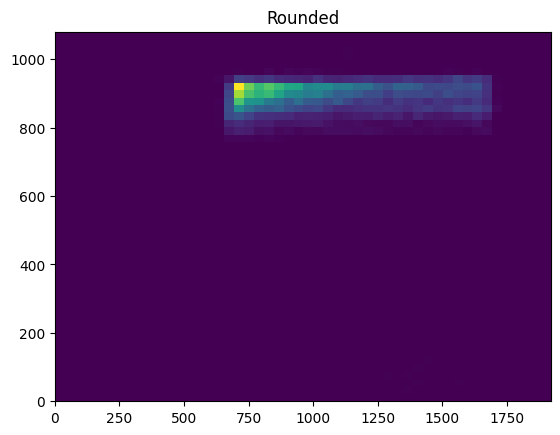

In [101]:
# First plot
heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
extent = [0, 1920, 0, 1080]  # Define the extent
plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower', aspect='auto')
plt.title("Not rounded")
plt.xlim(0, 1920)  # Set x-axis limits
plt.ylim(0, 1080)  # Set y-axis limits
plt.show()

# Second plot with rounded data
x1 = x.round(1)
y1 = y.round(1)
heatmap, xedges, yedges = np.histogram2d(x1, y1, bins=50)
plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower', aspect='auto')
plt.title("Rounded")
plt.xlim(0, 1920)  # Set x-axis limits
plt.ylim(0, 1080)  # Set y-axis limits
plt.show()

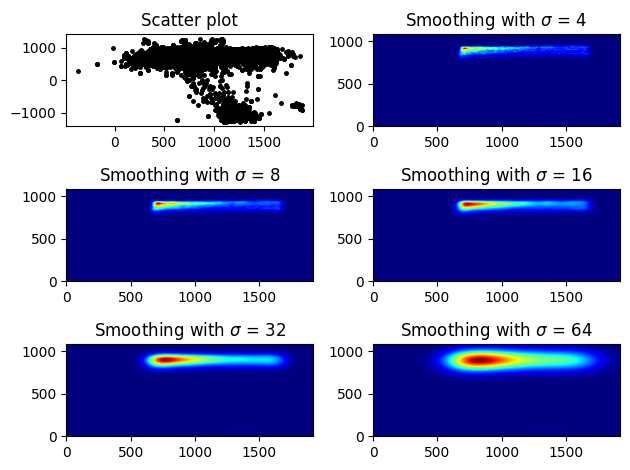

In [102]:

def myplot(x, y, s, bins=1000):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)
    extent = [0, 1920, 0, 1080]  # Define the extent
    return heatmap.T, extent

fig, axs = plt.subplots(3, 2)

# Generate some test data (assuming gaze is a DataFrame containing x and y coordinates)
x = gaze['left_gaze_point_on_display_area_x'] * 1920
y = gaze['left_gaze_point_on_display_area_y'] * -1080 + 1080

sigmas = [0, 4, 8, 16, 32, 64]

for ax, s in zip(axs.flatten(), sigmas):
    if s == 0:
        ax.plot(x, y, 'k.', markersize=5)
        ax.set_title("Scatter plot")
    else:
        img, extent = myplot(x, y, s)
        ax.imshow(img, extent=extent, origin='lower', cmap=cm.jet, aspect='auto')
        ax.set_title("Smoothing with $\sigma$ = %d" % s)
        ax.set_xlim(0, 1920)  # Set x-axis limits
        ax.set_ylim(0, 1080)  # Set y-axis limits

plt.tight_layout()
plt.show()